In [1]:
### STEP 1: Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("datacsv.csv")

In [3]:
# Display first 5 rows
display(df.head())

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",01-03-2006,25-09-2023
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",08-03-2006,25-09-2023
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",08-03-2006,25-09-2023
3,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",03-02-2005,25-09-2023
4,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",01-07-2003,25-09-2023


In [4]:
# Check for missing values
display(df.isnull().sum())

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                  7695
Event Name                                    7795
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       421
Origin                                        6429
Associated Types                              6964
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

In [5]:
# Data types and basic info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10330 entries, 0 to 10329
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     10330 non-null  object 
 1   Historic                                   10330 non-null  object 
 2   Classification Key                         10330 non-null  object 
 3   Disaster Group                             10330 non-null  object 
 4   Disaster Subgroup                          10330 non-null  object 
 5   Disaster Type                              10330 non-null  object 
 6   Disaster Subtype                           10330 non-null  object 
 7   External IDs                               2635 non-null   object 
 8   Event Name                                 2535 non-null   object 
 9   ISO                                        10330 non-null  object 
 10  Country               

None

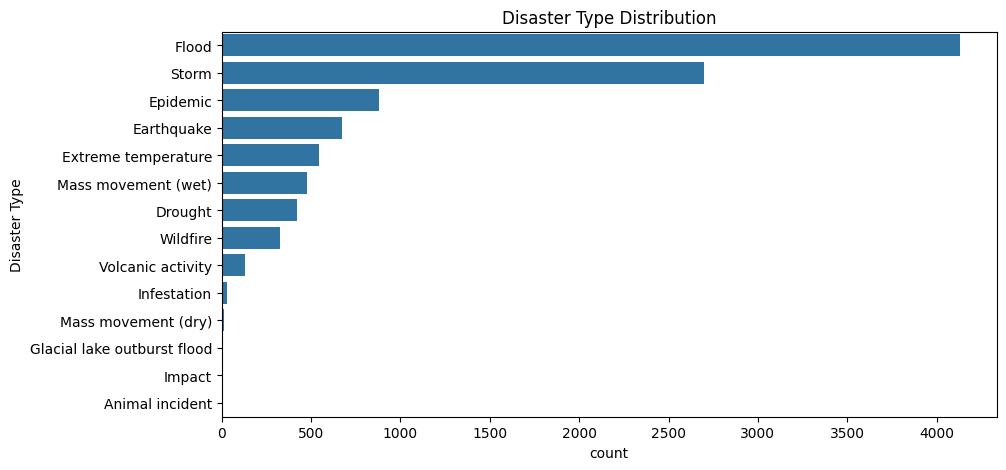

In [6]:
# Visualizing disaster distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Disaster Type'], order=df['Disaster Type'].value_counts().index)
plt.title("Disaster Type Distribution")
plt.show()

In [7]:
### STEP 2: Data Preprocessing
# Selecting relevant columns
columns_to_keep = ['Disaster Type', 'Disaster Subtype', 'Magnitude', 'Magnitude Scale',
                   'Country', 'Region', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
                   'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured',
                   'No. Affected', 'No. Homeless', 'Total Affected']
df = df[columns_to_keep]

In [8]:
# Handling missing values with appropriate methods
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\dasar\AppData\Local\Temp\ipykernel_5372\1751845615.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\dasar\AppData\Local\Temp\ipykernel_5372\1751845615.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\dasar\AppData\Local\Temp\ipykernel_5372\4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
# Convert float columns to integers where applicable
df = df.astype({col: 'int' for col in df.select_dtypes(include=['float64']).columns})

In [11]:
# Encoding categorical variables using OneHotEncoder
categorical_cols = ['Disaster Type', 'Disaster Subtype', 'Magnitude Scale', 'Country', 'Region']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
column_transformer = ColumnTransformer(transformers=[('cat', ohe, categorical_cols)], remainder='passthrough')
df_encoded = column_transformer.fit_transform(df)

In [12]:
# Convert encoded array back to DataFrame
encoded_feature_names = column_transformer.get_feature_names_out()
df = pd.DataFrame(df_encoded, columns=encoded_feature_names)

In [13]:
### STEP 3: Data Training
# Splitting dataset into features (X) and target (y)
X = df.drop(columns=['remainder__Total Deaths'])  # Adjusted column name after encoding
y = df['remainder__Total Deaths']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [16]:
# Train and evaluate each model
results = {}
feature_importances = {}

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R-Squared Score": r2
    }
     # Capture feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
    print(f"{name} Results:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-Squared Score: {r2:.2f}\n")

Linear Regression Results:
Mean Absolute Error: 326.99
Mean Squared Error: 584823.90
R-Squared Score: -1.16

Decision Tree Results:
Mean Absolute Error: 247.40
Mean Squared Error: 36469328.38
R-Squared Score: -133.83

Gradient Boosting Results:
Mean Absolute Error: 216.61
Mean Squared Error: 13179932.77
R-Squared Score: -47.73

XGBoost Results:
Mean Absolute Error: 283.73
Mean Squared Error: 18873659.03
R-Squared Score: -68.78

